# Scrapping
Pada tahapan ini akan dilakukan scrapping data yang diambil dari situs detik.com

In [ ]:
# Melakukan import terhadap modul-modul yang dibutuhkan
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

In [ ]:
# Melakukan scrapping data
def scrape_detik(hal):
  global hades
  a = 1
  for page in range(1,hal):
    url = f'https://www.detik.com/search/searchall?query=pilpres&sortby=time&fromdatex=01/03/2023&todatex=31/05/2023&page={page}'
    ge = req.get(url,hades).text
    sop = bs(ge, 'lxml')
    li = sop.find('div', class_='list media_rows list-berita')
    lin = li.find_all('article')
    for x in lin:
      link = x. find('a')['href']
      date = x.find('a').find('span', class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
      headline = x.find('a').find('h2').text
      ge_ =req.get(link,hades).text
      sop_ =bs(ge_,'lxml')
      content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
      for x in content:
        x = x.find_all('p')
        y = [y.text for y in x]
        content_ = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
        print(f'done[{a}] > {headline[0:10]}')
        a += 1
        with open ('pilpres.csv','a')as file:
          wr = csv.writer(file, delimiter=',')
          wr.writerow([headline,date,link,content_])

In [ ]:
scrape_detik(150)

done[1] > Soal 'Cawe
done[2] > Jubir Anie
done[3] > Faldo Jela
done[4] > Ikut Perte
done[5] > Namanya Te
done[6] > Relawan Ru
done[7] > Kini Beda 
done[8] > Sandiaga U
done[9] > Gerindra s
done[10] > Sandiaga A
done[11] > PD Sebut P
done[12] > Komisi III
done[13] > Simulasi C
done[14] > KKIR Belum
done[15] > Top of Min
done[16] > Jokowi Bic
done[17] > PDIP Banta
done[18] > Soal Jokow
done[19] > PKB Heran 
done[20] > 67 Desa di
done[21] > Adu Perspe
done[22] > NasDem Ung
done[23] > Bupati Pan
done[24] > Prabowo: S
done[25] > Survei Fix
done[26] > Bertemu Pe
done[27] > Demokrat s
done[28] > PPP Tepis 
done[29] > PBB Ungkap
done[30] > PKB Tak Ma
done[31] > Elite PDIP
done[32] > Ganjar Roa
done[33] > Beda Suara
done[34] > Pakar UI P
done[35] > PKS soal C
done[36] > PKS: Kalau
done[37] > Pemilu Raw
done[38] > PDIP Tak K
done[39] > Anies Bica
done[40] > Respons Na
done[41] > Benyamin D
done[42] > Luhut Sent
done[43] > Prabowo Un
done[44] > Ramai Airl
done[45] > NasDem: Sa
done[46] > Jokowi B

In [ ]:
# Melakukan import terhadap modul yang dibutuhkan
import pandas as pd
# Menampilkan hasil scrapping
df = pd.read_csv('/content/pilpres.csv')
df

,"Soal 'Cawe-cawe', Demokrat Perbandingkan Dua Keterangan Jokowi",31 Mei 2023 23:47,https://news.detik.com/pemilu/d-6749902/soal-cawe-cawe-demokrat-perbandingkan-dua-keterangan-jokowi,"Wakil Sekretaris Jenderal Partai Demokrat Agust Jovan Latuconsina menyoroti pemilihan kata cawe-cawe yang diucapkan Presiden Joko Widodo (Jokowi). Menurutnya, diksi yang disampaikan tidak tepat.""Yang sangat kami sayangkan sebetulnya permainan diksi dari Pak Jokowi,"" ujar Jovan, dalam diskusi Adu Perspektif 'Jokowi Cawe-cawe, Pemilu 2024 Makin Ramai', Rabu (31/5/2023).Jovan menyebut Jokowi adalah pemimpin negara yang pernyataannya didengar oleh banyak orang. Ia mengatakan, kesalahan pemilihan kata dapat menimbulkan berbagai interpretasi.\r \r \r \r ""Kira harus menyadari bahwa Pak Jokowi ini kan presiden pimpinan negara, jadi kata-kata apapun yang di keluarkan beliau ibarat kita di kerajaan itu adalah titah, kalau beliau selip dalam menyebutkan sebuah kalimat, jangankan kalimat, kata saja itu bisa interpretasinya macam-macam, dan tidak hanya satu dua orang tapi seluruh masyarakat,"" kata Jovan.Jovan mengatakan, menjadi tugas presiden untuk memastikan pemilu berjalan lancar jujur dan adil. Namun, diksi cawe-cawe yang dipilih disebut dapat diartikan sebagi upaya intervensi.""Kalau pada tanggal 4 Mei dikatakan tidak akan cawe-cawe dan ditanggal 29 Mei beliau sendiri yang meralat akan cawe-cawe dalam konteks untuk menyelamatkan bangsa. Pertanyaanya kalau sebagai pimpinan negara dan beliau ingin pemilu ini berjalan lancar, demokratis, jujur dan adil itu memang tugas dan tanggung jawab beliau sebagai pemimpin negara,"" tuturnya.""Tapi kalau kata-katanya diganti sebagai cawe-cawe maka jangan salahkan kami, jangan salahkan masyarakat awam, menginterpretasikannya sebagai intervensi, campur tangan dalam hal-hal yang sebenarnya bukan tanggung jawab beliau,"" sambungnya.Ia juga menilai kata cawe-cawe dapat menimbulkan kekhawatiran publik. Salah satunya dengan dugaan memanfaatkan kekuasaan untuk mendapat hasil pemilu sesuai keinginan Jokowi.""Kata-kata cawe-cawe ini kan membuat kekhawatiran bagi publik, jangan-jangan istilah ini bisa memanfaatkan aparatur negara, bisa memanfaatkan kekuasaan, bisa memanfaatkan daya yang dimiliki pemimpin negara untuk mendapatkan hasil pemilu yang beliau inginkan. Kembali saya fokus pada kata cawe-cawe ini, kalau tidak mengenakan kata cawe-cawe maka bagi kami memang sudah sewajarnya sebagai pemimpin negara tugas dan tunggung jawab beliau untuk menjaga pemilu 2024 berjalan damai, demokratis,"" tuturnya.Sebelumnya, 4 Mei 2023, saat Jokowi di Sarinah, Jakarta Pusat, dia menyatakan tidak caw-cawe urusan Capres 2024. Pertemuannya dengan enam ketum parpol sebelumnya adalah diskusi politik saja.""Cawe-cawe? He..he..he.. bukan cawe-cawe. Itu diskusi aja kok, kok cawe-cawe. Diskusi, saya tadi sudah sampaikan saya ini kan juga pejabat politik. Saya bukan cawe-cawe,"" kata Jokowi di Sarinah, saat itu.Pada 29 Mei 2023, saat Jokowi di Istana Negara, dia mengatakan akan cawe-cawe demi bangsa dan negara. Namun dia menjelaskan, pengertian cawe-cawe ini dalam arti positif.""Demi bangsa dan negara saya akan cawe-cawe, tentu saja dalam arti yang positif,"" ucap Jokowi di Istana Negara, Senin (29/5).""Saya tidak akan melanggar aturan, tidak akan melanggar undang-undang, dan tidak akan mengotori demokrasi,"" kata Jokowi"
0,Jubir Anies Balas Sentilan Luhut soal Perubaha...,31 Mei 2023 23:45,https://www.detik.com/jateng/berita/d-6749901/...,Menteri Koordinator Kemaritiman dan Investasi ...
1,Faldo Jelaskan 'Jokowi Cawe-cawe Pemilu' Agar ...,31 Mei 2023 22:43,https://news.detik.com/pemilu/d-6749875/faldo-...,Stafsus Mensesneg Faldo Maldini menjelaskan ma...
2,"Ikut Pertemuan Jokowi-Pemred-Influencer, Total...",31 Mei 2023 22:36,https://news.detik.com/pemilu/d-6749871/ikut-p...,"Co-Founder Total Politik, Arie Putra, mengungk..."
3,Namanya Teratas di Simulasi Cagub DKI Versi AS...,31 Mei 2023 20:09,https://news.detik.com/pemilu/d-6749695/namany...,Nam

Selanjutnya, file akan didownload dan disimpan di link berikut: https://drive.google.com/drive/folders/1IwZ0_RruKD0an1wLUKad9xRo5a6eKEUZ dengan nama pilpres.csv


# Preprocessing
Pada tahapan ini akan dilakukan pengubahan semua huruf menjadi huruf kecil, penghapusan stop words, lematisasi, dan penggabungan kata

In [ ]:
# Memberi nama pada setiap kolom
df.columns = ['Headline','Date','Link','Content']
df

,Headline,Date,Link,Content
0,Jubir Anies Balas Sentilan Luhut soal Perubaha...,31 Mei 2023 23:45,https://www.detik.com/jateng/berita/d-6749901/...,Menteri Koordinator Kemaritiman dan Investasi ...
1,Faldo Jelaskan 'Jokowi Cawe-cawe Pemilu' Agar ...,31 Mei 2023 22:43,https://news.detik.com/pemilu/d-6749875/faldo-...,Stafsus Mensesneg Faldo Maldini menjelaskan ma...
2,"Ikut Pertemuan Jokowi-Pemred-Influencer, Total...",31 Mei 2023 22:36,https://news.detik.com/pemilu/d-6749871/ikut-p...,"Co-Founder Total Politik, Arie Putra, mengungk..."
3,Namanya Teratas di Simulasi Cagub DKI Versi AS...,31 Mei 2023 20:09,https://news.detik.com/pemilu/d-6749695/namany...,Nama Gubernur Jawa Barat Ridwan Kamil (RK) men...
4,"Relawan Rumah Jokowi Deklarasi Dukung Ganjar, ...",31 Mei 2023 19:25,https://news.detik.com/pemilu/d-6749637/relawa...,Relawan Rumah Jokowi deklarasikan dukungannya ...
...,...,...,...,...
2026,Ganjar Tancap Gas Safari ke Daerah-daerah Usai...,01 Mei 2023 09:37,https://news.detik.com/pemilu/d-6697942/ganjar...,Usai dideklarasikan menjadi calon presiden (ca...
2027,"PPP: Ganjar Nasionalis, Wakilnya Harus Mewakil...",01 Mei 2023 09:08,https://news.detik.com/pemilu/d-6697907/ppp-ga...,"Gubernur Jawa Tengah sekaligus Capres PDIP, Ga..."
2028,"Prabowo Kantongi Nama Cawapres, PKB Yakin Soso...",01 Mei 2023 08:55,https://news.detik.com/pemilu/d-6697900/prabow...,Ketua Umum Partai Gerindra Prabowo Subianto me...
2029,"4 Partai Resmi Dukung Ganjar Pranowo, Ini Daft...",01 Mei 2023 08:38,https://www.detik.com/sumut/berita/d-6697881/4...,Ganjar Pranowo resmi diusung PDIP untuk menjad...


In [ ]:
# Melakukan drop pada kolom yang tidak diperlukan
df = df.drop(['Link'],axis=1)
df

,Headline,Date,Content
0,Jubir Anies Balas Sentilan Luhut soal Perubaha...,31 Mei 2023 23:45,Menteri Koordinator Kemaritiman dan Investasi ...
1,Faldo Jelaskan 'Jokowi Cawe-cawe Pemilu' Agar ...,31 Mei 2023 22:43,Stafsus Mensesneg Faldo Maldini menjelaskan ma...
2,"Ikut Pertemuan Jokowi-Pemred-Influencer, Total...",31 Mei 2023 22:36,"Co-Founder Total Politik, Arie Putra, mengungk..."
3,Namanya Teratas di Simulasi Cagub DKI Versi AS...,31 Mei 2023 20:09,Nama Gubernur Jawa Barat Ridwan Kamil (RK) men...
4,"Relawan Rumah Jokowi Deklarasi Dukung Ganjar, ...",31 Mei 2023 19:25,Relawan Rumah Jokowi deklarasikan dukungannya ...
...,...,...,...
2026,Ganjar Tancap Gas Safari ke Daerah-daerah Usai...,01 Mei 2023 09:37,Usai dideklarasikan menjadi calon presiden (ca...
2027,"PPP: Ganjar Nasionalis, Wakilnya Harus Mewakil...",01 Mei 2023 09:08,"Gubernur Jawa Tengah sekaligus Capres PDIP, Ga..."
2028,"Prabowo Kantongi Nama Cawapres, PKB Yakin Soso...",01 Mei 2023 08:55,Ketua Umum Partai Gerindra Prabowo Subianto me...
2029,"4 Partai Resmi Dukung Ganjar Pranowo, Ini Daft...",01 Mei 2023 08:38,Ganjar Pranowo resmi diusung PDIP untuk menjad...


In [ ]:
 # Melakukan import terhadap modul-modul yang dibutuhkan
import numpy as np
import warnings; warnings.simplefilter('ignore')
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk import sentiment
# Melakukan pengubahan huruf menjadi huruf kecil, penghapusan stop words, lematisasi, dan penggabungan kata
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()
sentiment = SentimentIntensityAnalyzer()

def finalpreprocess(text):
  tokens = word_tokenize(text.lower()) # pengubahan huruf menjadi huruf kecil
  tokens = [token for token in tokens if token not in stop_words] # penghapusan stop words
  tokens = [lemmatizer.lemmatize(token) for token in tokens] # lematisasi
  finalpreprocess = ' '.join(tokens) # penggabungan kata

  return finalpreprocess

# Penghapusan tanda baca
def punctuation(text):
  trans = str.maketrans('','',string.punctuation)
  remove_punc = text.translate(trans)

  return remove_punc

df['Headline'] = df['Headline'].apply(finalpreprocess) # diaplikasikan pada kolom Headline
df['Content'] = df['Content'].apply(finalpreprocess) # diaplikasikan pada kolom Content
df['Headline'] = df['Headline'].apply(punctuation) # diaplikasikan pada kolom Headline
df['Content'] = df['Content'].apply(punctuation) #diaplikasikan pada kolom Content
df # menampilkan data yang telah dibersihkan

,Headline,Date,Content
0,jubir anies balas sentilan luhut perubahan su...,31 Mei 2023 23:45,menteri koordinator kemaritiman investasi luhu...
1,faldo jokowi cawecawe pemilu pekerjaannya dil...,31 Mei 2023 22:43,stafsus mensesneg faldo maldini maksud preside...
2,pertemuan jokowipemredinfluencer total politi...,31 Mei 2023 22:36,cofounder total politik arie putra isi perte...
3,namanya teratas simulasi cagub dki versi asi ...,31 Mei 2023 20:09,nama gubernur jawa barat ridwan kamil rk men...
4,relawan rumah jokowi deklarasi dukung ganjar ...,31 Mei 2023 19:25,relawan rumah jokowi deklarasikan dukungannya ...
...,...,...,...
2026,ganjar tancap gas safari daerahdaerah capres pdip,01 Mei 2023 09:37,dideklarasikan calon presiden capres ganjar...
2027,ppp ganjar nasionalis wakilnya mewakili kelo...,01 Mei 2023 09:08,gubernur jawa capres pdip ganjar pranowo mem...
2028,prabowo kantongi nama cawapres pkb sosoknya c...,01 Mei 2023 08:55,ketua partai gerindra prabowo subianto mengaku...
2029,4 partai resmi dukung ganjar pranowo daftarnya,01 Mei 2023 08:38,ganjar pranowo resmi diusung pdip calon presid...


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Melakukan import terhadap modul yang dibutuhkan
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Melakukan pengelompokan emosi
negative = []
neutral = []
positive = []

for n in range(df.shape[0]):
  headline = df.iloc[n,0]
  content = df.iloc[n,2]
  headline_analyzed = sentiment.polarity_scores(headline)
  content_analyzed = sentiment.polarity_scores(content)
  negative.append(((headline_analyzed['neg']) + (content_analyzed['neg']))/2)
  neutral.append(((headline_analyzed['neu']) + (content_analyzed['neu']))/2)
  positive.append(((headline_analyzed['pos']) + (content_analyzed['pos']))/2)
df['Negative'] = negative
df['Neutral'] = neutral
df['Positive'] = positive

pd.set_option('display.max_columns', None)
print(df.head())

                                            Headline                 Date  \
0  jubir anies balas sentilan luhut perubahan  su...   31 Mei 2023 23:45    
1  faldo jokowi cawecawe pemilu  pekerjaannya dil...   31 Mei 2023 22:43    
2  pertemuan jokowipemredinfluencer  total politi...   31 Mei 2023 22:36    
3  namanya teratas simulasi cagub dki versi asi  ...   31 Mei 2023 20:09    
4  relawan rumah jokowi deklarasi dukung ganjar  ...   31 Mei 2023 19:25    

                                             Content  Negative  Neutral  \
0  menteri koordinator kemaritiman investasi luhu...    0.0000   1.0000   
1  stafsus mensesneg faldo maldini maksud preside...    0.0085   0.9695   
2  cofounder total politik  arie putra  isi perte...    0.0000   0.9935   
3  nama gubernur jawa barat ridwan kamil  rk  men...    0.0000   1.0000   
4  relawan rumah jokowi deklarasikan dukungannya ...    0.0000   1.0000   

   Positive  
0    0.0000  
1    0.0220  
2    0.0065  
3    0.0000  
4    0.0000  


In [ ]:
# Melakukan pengecekan 5 berita teratas berdasarkan emosi
print(df.nlargest(5,['Negative'])) # negatif
print(df.nlargest(5,['Neutral'])) # neutral
print(df.nlargest(5,['Positive'])) # positif

                                               Headline                 Date  \
1710  survei cawapres spin  erick thohir 182   ahy 1...   08 Mei 2023 15:03    
780   gibran trauma dicium berkumis relawan jokowi j...   12 Mei 2023 12:12    
1580  gibran trauma dicium berkumis relawan jokowi j...   12 Mei 2023 12:12    
34         pks  anies menang ambil kebijakan anti asing   30 Mei 2023 21:57    
834        pks  anies menang ambil kebijakan anti asing   30 Mei 2023 21:57    

                                                Content  Negative  Neutral  \
1710  lembaga survey polling indonesia spin menggela...    0.1755    0.815   
780   wali kota solo gibran rakabuming raka mengaku ...    0.1670    0.833   
1580  wali kota solo gibran rakabuming raka mengaku ...    0.1670    0.833   
34    ketua fraksi pks dpr ri jazilu juwaini partain...    0.1600    0.840   
834   ketua fraksi pks dpr ri jazilu juwaini partain...    0.1600    0.840   

      Positive  
1710    0.0095  
780     0.0000  

In [ ]:
# Melakukan pengecekan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Headline  2031 non-null   object 
 1   Date      2031 non-null   object 
 2   Content   2031 non-null   object 
 3   Negative  2031 non-null   float64
 4   Neutral   2031 non-null   float64
 5   Positive  2031 non-null   float64
dtypes: float64(3), object(3)
memory usage: 95.3+ KB


In [ ]:
 # Melakukan pengecekan missing value
df.isnull().sum()

Headline    0
Date        0
Content     0
Negative    0
Neutral     0
Positive    0
dtype: int64

In [ ]:
# Menyimpan data hasil pre-processing ke file CSV
df.to_csv('pilpres_preprocess.csv', index=False)

Selanjutnya, file akan didownload dan disimpan di link berikut: https://drive.google.com/drive/folders/1IwZ0_RruKD0an1wLUKad9xRo5a6eKEUZ dengan nama pilpres_preprocess.csv

# Visualization
Pada tahapan ini akan dilakukan visualisasi dengan menggunakan:
1. Cirrus
2. Links
3. Word Frequencies
4. Word Tree



1. Cirrus
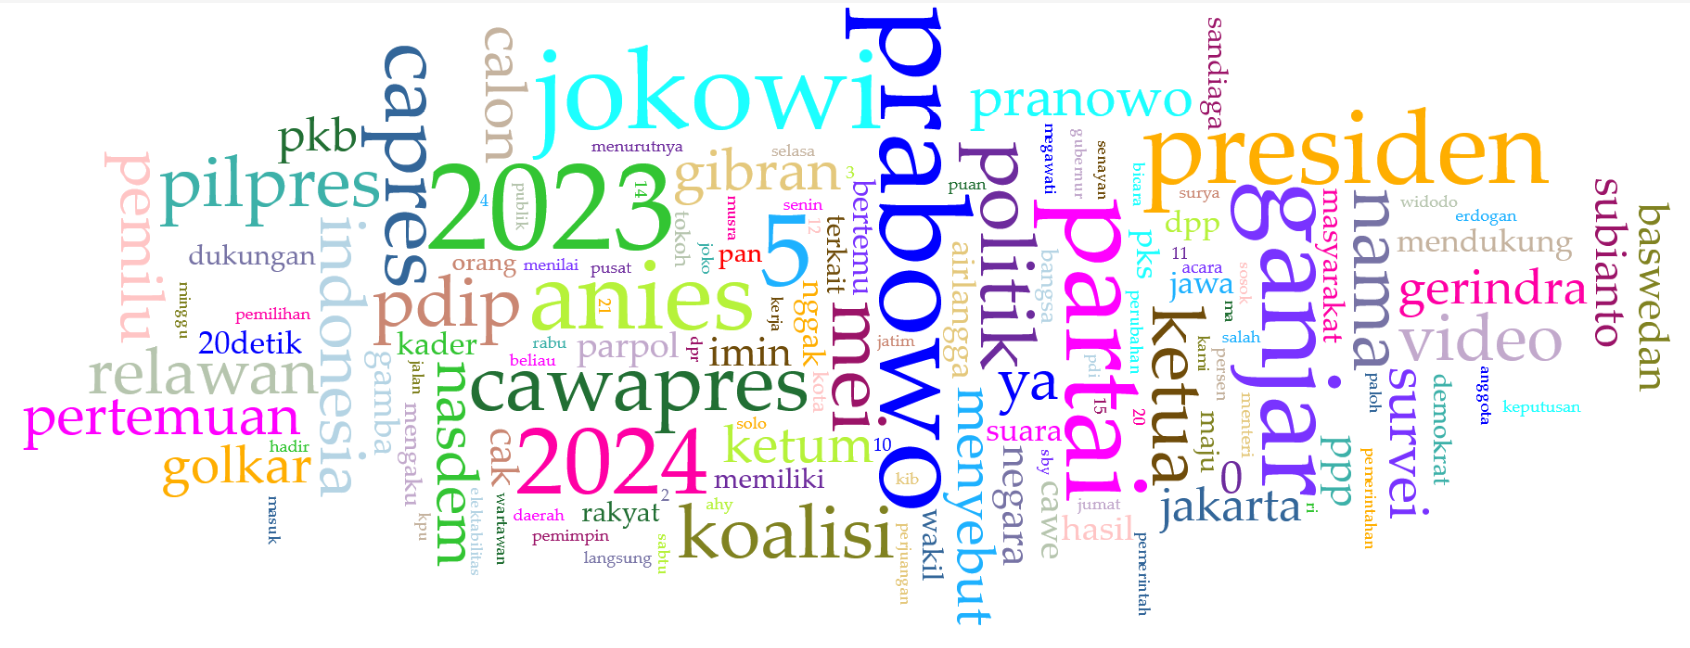

2. Links
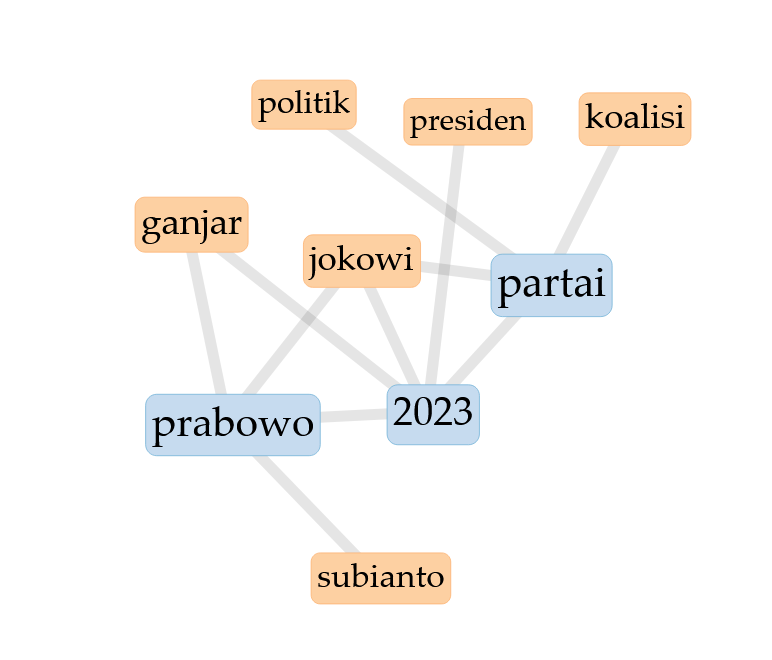

3. Word Frequencies
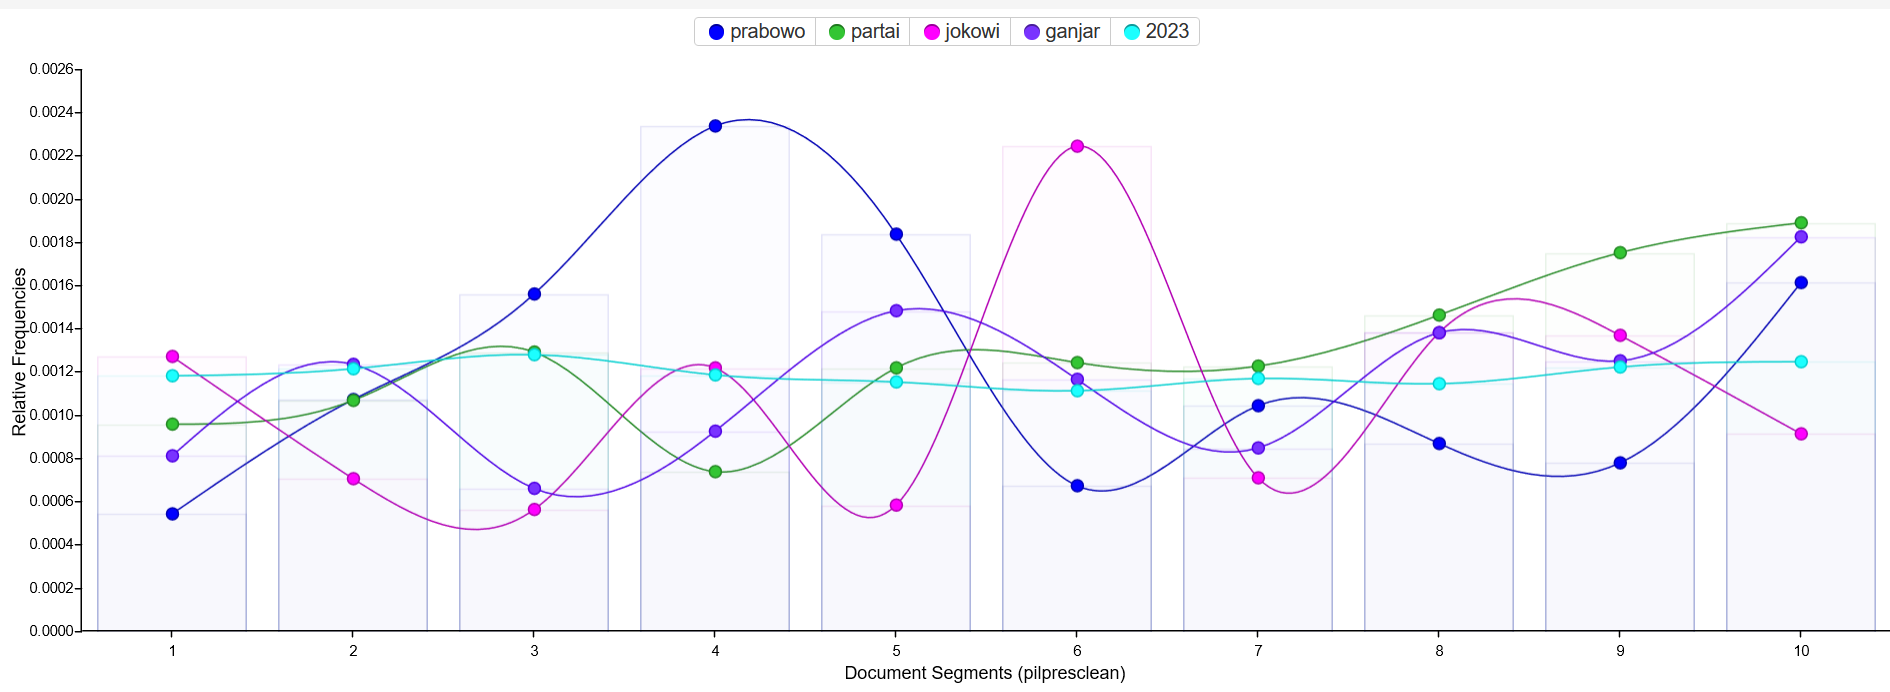

4.Word Tree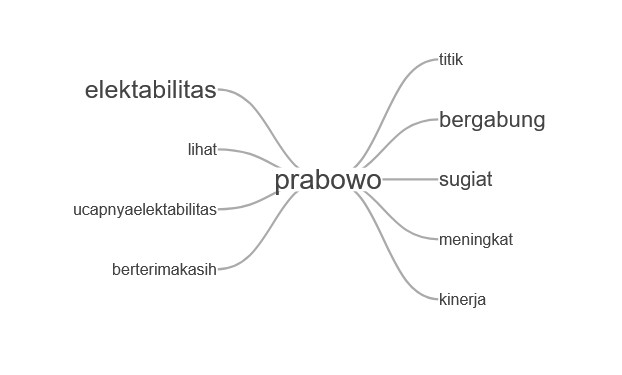